<h1>Diamond price prediction using Multiple Linear Regression </h1>

In this notebook, we will use the Diamond price dataset from Kaggle to develop a price prediction model using multiple linear regression. Diamond prices depend on various attributes of the diamond such as carat, cut, clarity etc. The dataset containts over 53000 rows and 10 variables.

<h2> Importing required libraries </h2>

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

<h2> Loading the dataset </h2>

In [168]:
print(os.listdir("../"))
diamond = pd.read_csv("../Diamond/diamonds.csv")
diamond.head()

['Diamond', 'nyc-busdata-analysis', '.DS_Store', 'HowToUseGit.txt']


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<b>We can see an unwanted column in the dataset, 'Unnamed: 0'. We must drop this column as it plays no role in our prediction.</b>

In [169]:
diamond = diamond.drop('Unnamed: 0', axis = 1)

In [170]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<h2>Understanding the data better </h2>

<b>Visualizing the spread of the data</b>

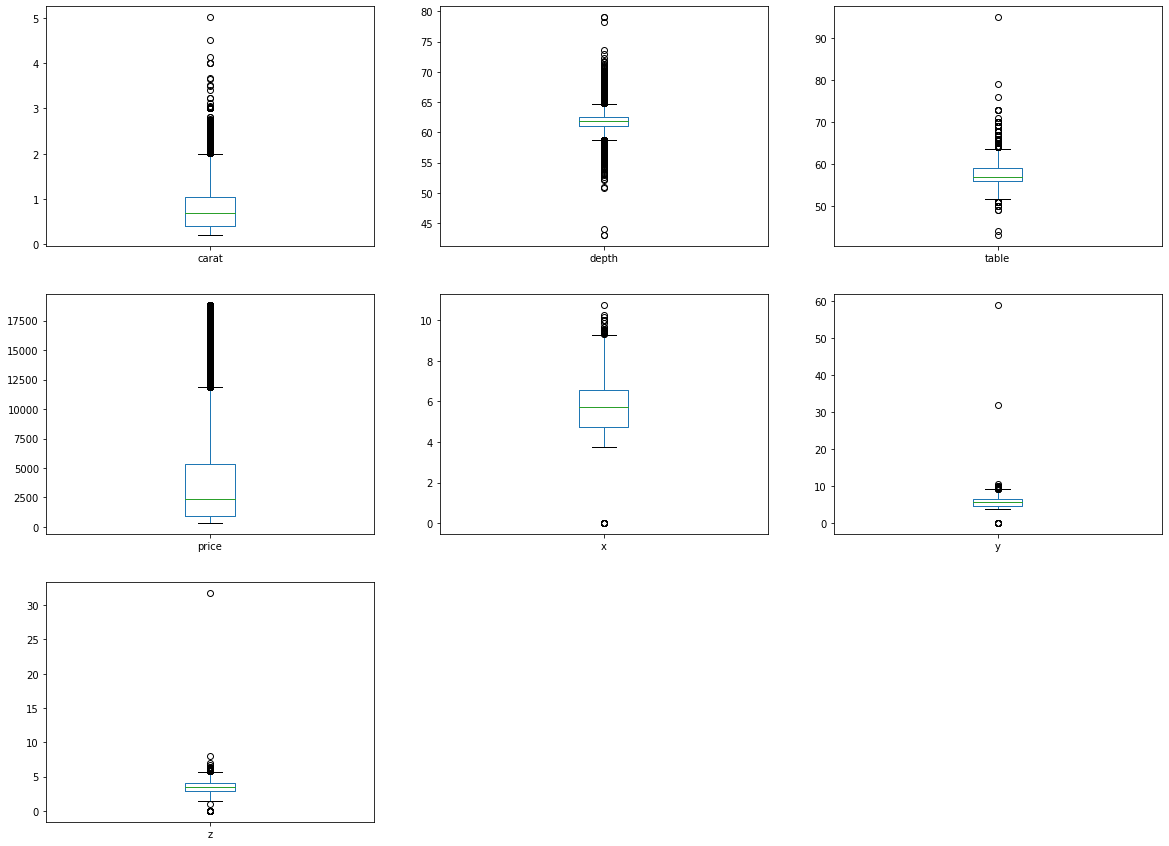

In [171]:
diamond.plot(kind='box', subplots=True, layout=(3,3), figsize=(20,15))
plt.show()

<h3>Conclusion from the box plots</h3>

<b>From the box plot, we can see there are some outliers affecting the spread of the data. Also, there seem to be extremely small values in the columns x, y and z representing the dimensions of the diamond. Let us describe the data statistically to take a closer look.</b>

In [172]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<b>Wait! The min value in the columns x, y and z are 0? That makes no sense. Let us take a closer look at the rows </b>

In [173]:
diamond.loc[(diamond['x'] == 0) | (diamond['y'] == 0) | (diamond['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [174]:
len(diamond[(diamond['x'] == 0) | (diamond['y'] == 0) | (diamond['z'] == 0)])

20

<b>We have 20 such values. Let us set them to NaN</b>

In [175]:
diamond[['x', 'y', 'z']] = diamond[['x','y','z']].replace(0, np.NaN)

<b>Just to confirm whether the zero values have been removed</b>

In [176]:
len(diamond[(diamond['x'] == 0) | (diamond['y'] == 0) | (diamond['z'] == 0)])

0

<b>Let us now check for null or NaN values in the columns</b>

In [178]:
diamond.isna().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [210]:
diamond.dropna(inplace=True)
diamond.isna().sum()

carat      0
depth      0
table      0
price      0
cut        0
color      0
clarity    0
volume     0
dtype: int64

<h2> Removing Outliers </h2>

<b>We will now remove the outliers from our dataset by replacing them with NaN values using a simple function.</b>

In [181]:
def outliers(var):
    a = []
    q1 = diamond[var].quantile(0.25)
    q2 = diamond[var].quantile(0.5)
    q3 = diamond[var].quantile(0.75)
    iqr = q3 - q1
    upper_limit = float(q3 + (1.5 * iqr))
    lower_limit = float(q1 - (1.5 * iqr))
    
    for i in diamond[var]:
        if i < lower_limit:
            i = np.NaN
        elif i > upper_limit:
            i = np.NaN
        else:
            i = i
        a.append(i)
    
    return a

for col in diamond.select_dtypes(exclude='object').columns:
    diamond[col] = outliers(col)

,carat,depth,table,price,x,y,z
count,52051.000000,51395.000000,53335.000000,50400.000000,53908.000000,53911.000000,53891.000000
mean,0.748738,61.776373,57.373404,3159.460833,5.730262,5.732353,3.538265
std,0.402096,1.116727,2.074349,2764.700316,1.116833,1.109132,0.689473
min,0.200000,58.800000,51.600000,326.000000,3.730000,3.680000,1.410000
25%,0.390000,61.100000,56.000000,911.000000,4.710000,4.720000,2.910000
50%,0.700000,61.900000,57.000000,2155.000000,5.700000,5.710000,3.530000
75%,1.020000,62.500000,59.000000,4669.000000,6.540000,6.540000,4.030000
max,2.000000,64.700000,63.500000,11883.000000,9.260000,9.260000,5.730000


In [184]:
diamond.isna().sum()

carat      1889
cut           0
color         0
clarity       0
depth      2545
table       605
price      3540
x            32
y            29
z            49
dtype: int64

<b>Let us replace the NaN values we just added by the mean</b>

In [138]:
for col in diamond.select_dtypes(exclude = 'object').columns:
    diamond[col] = diamond[col].fillna(diamond[col].mean())

In [187]:
diamond.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [188]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,47524.000000,47524.000000,47524.000000,47524.000000,47524.000000,47524.000000,47524.000000
mean,0.708700,61.786512,57.260186,3109.662381,5.546656,5.551478,3.428376
std,0.371104,1.105911,2.021552,2749.696633,0.979906,0.973990,0.606158
min,0.200000,58.800000,52.000000,326.000000,3.730000,3.680000,1.410000
25%,0.380000,61.100000,56.000000,890.000000,4.640000,4.650000,2.860000
50%,0.600000,61.900000,57.000000,2061.000000,5.440000,5.450000,3.360000
75%,1.010000,62.500000,59.000000,4636.250000,6.410000,6.410000,3.980000
max,2.000000,64.700000,63.500000,11883.000000,8.280000,8.270000,5.300000


<h2>Visualizing the spread of the data</h2>

<b>Let us now visualize the spread of the data after removing outliers</b>

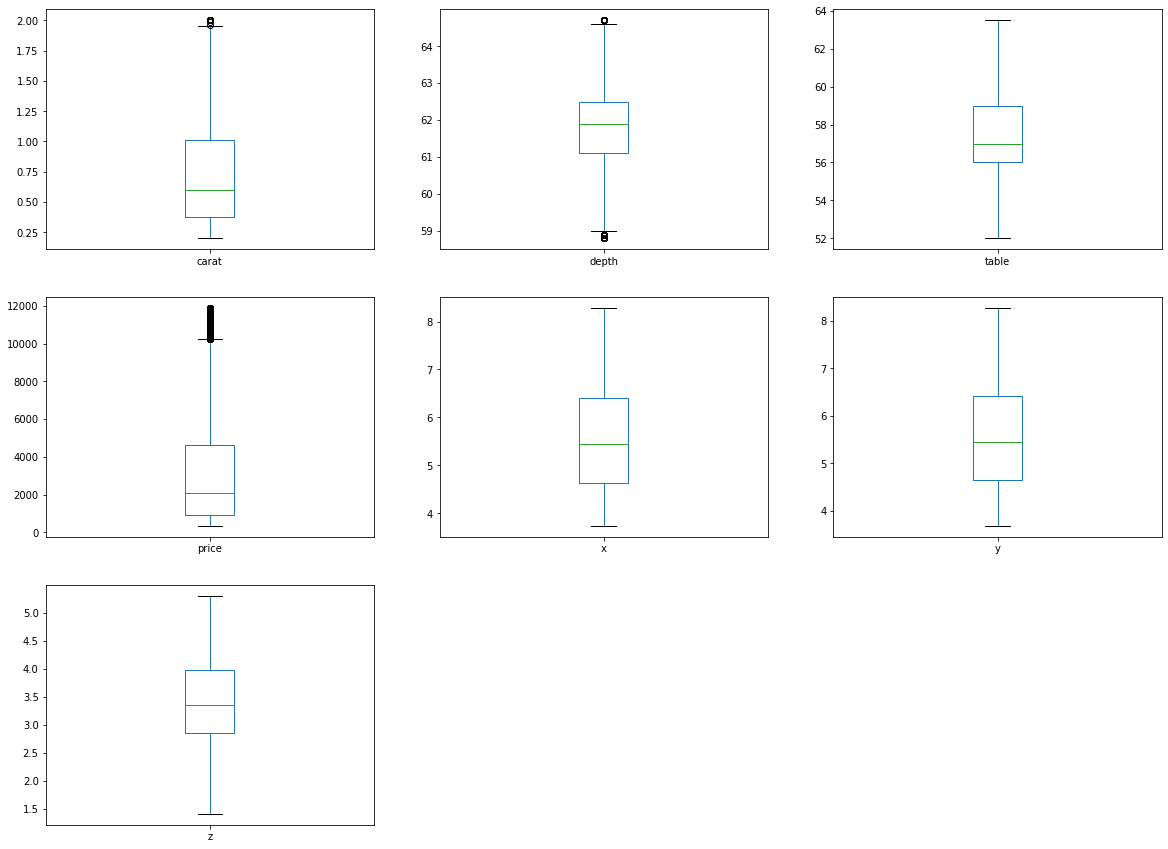

In [189]:
diamond.plot(kind='box', subplots = True, layout = (3,3) , figsize = (20,15))
plt.show()

<b>The spread is now fairly distributed and outliers have been removed! Let us take a look at the correlation matrix for these features</b>

In [190]:
corr = diamond.corr()
print(corr)

          carat     depth     table     price         x         y         z
carat  1.000000  0.035939  0.187384  0.922932  0.986262  0.985433  0.985069
depth  0.035939  1.000000 -0.240277  0.006180 -0.010557 -0.012217  0.092659
table  0.187384 -0.240277  1.000000  0.136834  0.186493  0.181058  0.159242
price  0.922932  0.006180  0.136834  1.000000  0.899843  0.900985  0.896579
x      0.986262 -0.010557  0.186493  0.899843  1.000000  0.998534  0.993348
y      0.985433 -0.012217  0.181058  0.900985  0.998534  1.000000  0.993171
z      0.985069  0.092659  0.159242  0.896579  0.993348  0.993171  1.000000


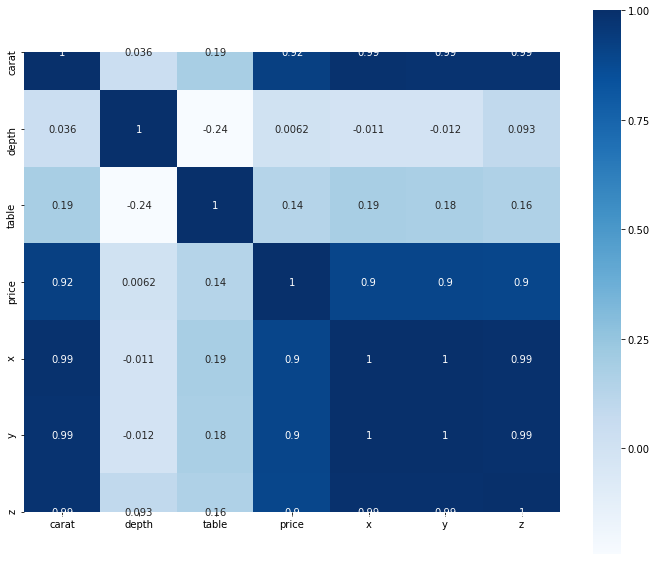

In [191]:
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, square = True, cmap = 'Blues')

<h3>Observations from the correlation matrix/heatmap </h3>
<ul>
    <li>Price is highly correlated to carat; in a positive direction. i.e higher the carat of the diamond, higher the price</li>
    <li>Price is correlated almost equally with x, y and z dimensions of the diamond</li>
    <li>Price is almost not correlated to depth of the diamond</li>
</ul>

<h2>Categorical variables</h2>

<b>Let us take a closer look at the categorical variables present in the dataset</b>

In [192]:
diamond_categories = diamond.select_dtypes(include = 'object')
diamond_categories['cut'].value_counts()

Ideal        20340
Premium      12115
Very Good    10994
Good          3745
Fair           330
Name: cut, dtype: int64

In [193]:
diamond_categories['clarity'].value_counts()

SI1     11552
VS2     10928
SI2      7402
VS1      7373
VVS2     4683
VVS1     3463
IF       1650
I1        473
Name: clarity, dtype: int64

In [194]:
diamond_categories['color'].value_counts()

G    10081
E     8910
F     8466
H     7176
D     6195
I     4462
J     2234
Name: color, dtype: int64

<b>Using LabelEncoder from the sklearn library we can encode these categorical variables to numerical variables</b>

In [195]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
diamond_categories = diamond_categories.apply(le.fit_transform)

In [196]:
diamond_categories

,cut,color,clarity
0,2,1,3
1,3,1,2
3,3,5,5
4,1,6,3
5,4,6,7
...,...,...,...
53935,2,0,2
53936,1,0,2
53937,4,0,2
53938,3,4,3


<b>Drop the original categorical variables from the dataset and concat the new (encoded) categorial variables</b>

In [197]:
diamond = diamond.drop(diamond_categories, axis = 1)
diamond = pd.concat([diamond, diamond_categories], axis = 1)

In [198]:
diamond.describe()

,carat,depth,table,price,x,y,z,cut,color,clarity
count,47524.000000,47524.000000,47524.000000,47524.000000,47524.000000,47524.000000,47524.000000,47524.000000,47524.000000,47524.000000
mean,0.708700,61.786512,57.260186,3109.662381,5.546656,5.551478,3.428376,2.624905,2.535624,3.885426
std,0.371104,1.105911,2.021552,2749.696633,0.979906,0.973990,0.606158,0.946761,1.683839,1.730605
min,0.200000,58.800000,52.000000,326.000000,3.730000,3.680000,1.410000,0.000000,0.000000,0.000000
25%,0.380000,61.100000,56.000000,890.000000,4.640000,4.650000,2.860000,2.000000,1.000000,2.000000
50%,0.600000,61.900000,57.000000,2061.000000,5.440000,5.450000,3.360000,2.000000,3.000000,4.000000
75%,1.010000,62.500000,59.000000,4636.250000,6.410000,6.410000,3.980000,3.000000,4.000000,5.000000
max,2.000000,64.700000,63.500000,11883.000000,8.280000,8.270000,5.300000,4.000000,6.000000,7.000000


<h2>Feature Engineering</h2>

<h3>Creating a new feature - Volume</h3>

In [199]:
diamond['volume'] = diamond['x'] * diamond['y'] * diamond['z']
diamond.tail()

,carat,depth,table,price,x,y,z,cut,color,clarity,volume
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50,2,0,2,115.920000
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61,1,0,2,118.110175
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56,4,0,2,114.449728
53938,0.86,61.0,58.0,2757.0,6.15,6.12,3.74,3,4,3,140.766120
53939,0.75,62.2,55.0,2757.0,5.83,5.87,3.64,2,0,3,124.568444


<b>Let us see how price varies with volume</b>

Text(0.5, 1.0, 'Price variation with Volume')

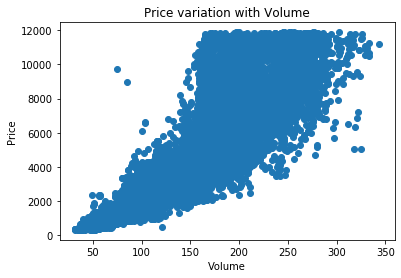

In [200]:
plt.scatter(diamond['volume'], diamond['price'])
plt.xlabel("Volume")
plt.ylabel("Price")
plt.title("Price variation with Volume")

<b>Drop x, y and z</b>

In [201]:
diamond.drop(['x','y','z'], axis = 1, inplace = True)
diamond.tail()

,carat,depth,table,price,cut,color,clarity,volume
53935,0.72,60.8,57.0,2757.0,2,0,2,115.920000
53936,0.72,63.1,55.0,2757.0,1,0,2,118.110175
53937,0.70,62.8,60.0,2757.0,4,0,2,114.449728
53938,0.86,61.0,58.0,2757.0,3,4,3,140.766120
53939,0.75,62.2,55.0,2757.0,2,0,3,124.568444


<h2>Modeling</h2>

<b>We are now moving towards the fun part - Modeling the price function!</b> <br>
We want to model the data in such a way that we can get <b>price</b> as a function of the other variables. That means, we want price to be our 'y', and all other variables to be our 'x1, x2, x3...xn' or 'X'.

In [202]:
X = diamond.drop('price', axis = 1)
y = diamond['price']

<b>Splitting the data into training and testing datasets</b>

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<b>Applying feature scaling</b>

In [204]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<b>Once we have our training and testing datasets, it is time to fit a linear regression model to the data</b>

In [205]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

<b>Let us find the R-squared value for this model</b>

In [206]:
lm.score(X_train,y_train)

0.885352323989044

In [207]:
lm.coef_

array([ 8.17134456e+02, -3.96882233e+01, -8.33796709e+01, -4.64561114e-01,
       -3.04061424e+02,  3.85730279e+02,  1.90204759e+03])

In [208]:
lm.intercept_

3100.123490886136

<b>Scoring the model on the test data</b>

In [209]:
lm.score(X_test,y_test)

0.8792515689357537